In [1]:
#lets getting dataset from the kaggle

import pandas as pd
import numpy as np
import statistics
import numpy as np

#needed for preprocessing in text for email part of this data
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
import re
    
import os
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding = 'latin-1')
'''
First of all, I had used email_classification.csv but since the data is very small, my accuracy turned out 100 percent. In order to validate
my model, I am using sms_spam data which is huge comparing to old one. 
'''


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'\nFirst of all, I had used email_classification.csv but since the data is very small, my accuracy turned out 100 percent. In order to validate\nmy model, I am using sms_spam data which is huge comparing to old one. \n'

In [2]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [4]:
print(df.isnull().sum())

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [5]:
variant_counts = df['v1'].value_counts()
print(variant_counts)

v1
ham     4825
spam     747
Name: count, dtype: int64


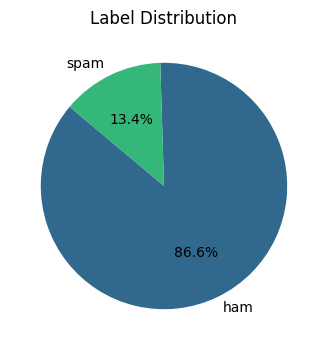

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# Count the number of occurrences for each class
class_counts = df['v1'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(class_counts)))
plt.title('Label Distribution')
plt.show()


In [7]:
#remove the redundant features from my original data
drop_features = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

# Drop the columns
df.drop(drop_features, axis=1, inplace=True)

# Verify that the columns have been dropped
print(df.columns)

Index(['v1', 'v2'], dtype='object')


In [8]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [9]:
#original structure is built having email and label accordingly. So i needed to fix it like this:
column_name = ['email', 'label']

df = pd.DataFrame({column_name[0]: df['v2'], column_name[1]: df['v1']})

In [10]:
df.head(10)

,email,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
5,FreeMsg Hey there darling it's been 3 week's n...,spam
6,Even my brother is not like to speak with me. ...,ham
7,As per your request 'Melle Melle (Oru Minnamin...,ham
8,WINNER!! As a valued network customer you have...,spam
9,Had your mobile 11 months or more? U R entitle...,spam


In [11]:
#MOST IMPORTANT PART IS:
def preprocessing_words(mylist):

    
    #first, get rid of non-alphabetics in the data
    mylist = re.sub('[^a-zA-Z]', ' ', mylist)
   
    #second, make the text to tokens as lowercases
    tokens = word_tokenize(mylist.lower())
    
    #third, remove the stopwords from my data
    filtered_sentence = []
    stop_words = set(stopwords.words('english'))    #my stopwords that i want to remove is based on english
    for w in tokens:                                #going through each tokens in email datas. 
        if w not in stop_words:                     #if no stopword is found,then save it into list (filtered_sentence)
            filtered_sentence.append(w)
            
    from nltk.stem import PorterStemmer
    #forth, go deeper until the stem of the saved token in filtered sentence
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in filtered_sentence] 
    #ps.stem(word) -- finding out the stem of word!, then add it into stemmed_token serie
    return stemmed_tokens

In [12]:
#after each token was stemmed, save all of tokens in stemmed format into new place in df ['email_processed']
df['email_processed'] = df['email'].apply(preprocessing_words)

In [13]:
df.head(10)

,email,label,email_processed
0,"Go until jurong point, crazy.. Available only ...",ham,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,Ok lar... Joking wif u oni...,ham,"[ok, lar, joke, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,U dun say so early hor... U c already then say...,ham,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,"Nah I don't think he goes to usf, he lives aro...",ham,"[nah, think, goe, usf, live, around, though]"
5,FreeMsg Hey there darling it's been 3 week's n...,spam,"[freemsg, hey, darl, week, word, back, like, f..."
6,Even my brother is not like to speak with me. ...,ham,"[even, brother, like, speak, treat, like, aid,..."
7,As per your request 'Melle Melle (Oru Minnamin...,ham,"[per, request, mell, mell, oru, minnaminungint..."
8,WINNER!! As a valued network customer you have...,spam,"[winner, valu, network, custom, select, receiv..."
9,Had your mobile 11 months or more? U R entitle...,spam,"[mobil, month, u, r, entitl, updat, latest, co..."


In [14]:
#seperate all emails into ham and spam data as a 2 different list

all_ham_data = []
all_spam_data = []

for i in range(len(df['label'])):
    if df['label'][i] == 'ham':
        all_ham_data += [df['email'][i]]
    else:
       all_spam_data += [df['email'][i]] 

In [15]:
type(all_spam_data)

list

In [16]:
#spam and ham data to string format of spam and ham data
#the reason is to be used in wordcloud. Word cloud needs to take input in string format. Thats why i need to change from list to string 
str_spam_data = ' '.join(all_spam_data)
str_ham_data = ' '.join(all_ham_data)

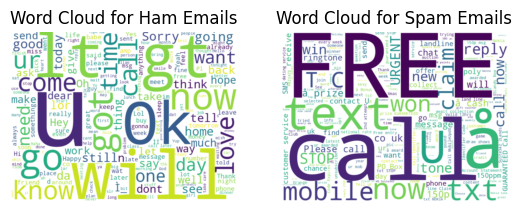

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Ham word cloud
plt.subplot(1, 2, 1)
ham_wordcloud = WordCloud(width=800, height=600, background_color='white').generate(str_ham_data)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Emails')

# Spam word cloud
plt.subplot(1, 2, 2)
spam_wordcloud =  WordCloud(width=800, height=600, background_color='white').generate(str_spam_data)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')

plt.show()

In [18]:
#after stemmign, I am wondering which word was used and how many times. 
# Addition to that, these words will be using in vectorise the email data so that i will go the model like features    

def token_most_common(spam_or_ham):
    from collections import Counter

    # fetch the data in series form 
    series_data = df['email_processed'][df['label'] == spam_or_ham]
    
    # change to list so that it would be flattened
    flattened_list = [item for sublist in series_data for item in sublist]

    # Join list into a single string
    str_data = ' '.join(flattened_list)
    
    #find the 20 most used words in ham and spam emails 
    c = Counter(word_tokenize(str_data))
    return c.most_common(20)


In [19]:
#calling most used common word function here
most_common_ham = token_most_common('ham')
most_common_spam = token_most_common('spam')

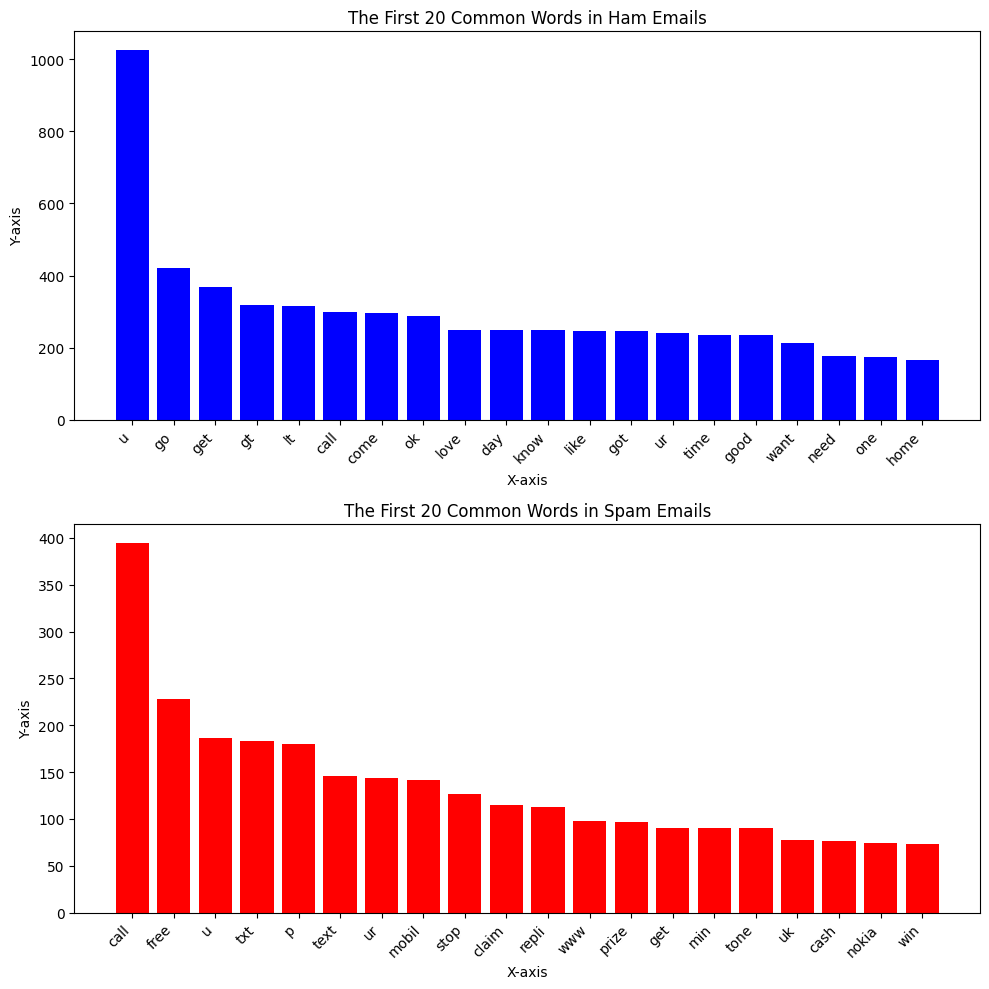

In [20]:
# let see how to visualise which word was used at most and how many times

# Extract x and y values for both data sets
x_values1 = [item[0] for item in most_common_ham]
y_values1 = [item[1] for item in most_common_ham]

x_values2 = [item[0] for item in most_common_spam]
y_values2 = [item[1] for item in most_common_spam]

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot the first data set on the first subplot
ax1.bar(x_values1, y_values1, color='blue')
ax1.set_title('The First 20 Common Words in Ham Emails')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_xticks(range(len(x_values1)))  # Set the ticks to the number of items
ax1.set_xticklabels(x_values1, rotation=45, ha='right')  # Rotate the labels

# Plot the second data set on the second subplot
ax2.bar(x_values2, y_values2, color='red')
ax2.set_title('The First 20 Common Words in Spam Emails')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_xticks(range(len(x_values2)))  # Set the ticks to the number of items
ax2.set_xticklabels(x_values2, rotation=45, ha='right')  # Rotate the labels

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

In [22]:
df.head(10)

,email,label,email_processed,label_encoded
0,"Go until jurong point, crazy.. Available only ...",ham,"[go, jurong, point, crazi, avail, bugi, n, gre...",0
1,Ok lar... Joking wif u oni...,ham,"[ok, lar, joke, wif, u, oni]",0
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,"[free, entri, wkli, comp, win, fa, cup, final,...",1
3,U dun say so early hor... U c already then say...,ham,"[u, dun, say, earli, hor, u, c, alreadi, say]",0
4,"Nah I don't think he goes to usf, he lives aro...",ham,"[nah, think, goe, usf, live, around, though]",0
5,FreeMsg Hey there darling it's been 3 week's n...,spam,"[freemsg, hey, darl, week, word, back, like, f...",1
6,Even my brother is not like to speak with me. ...,ham,"[even, brother, like, speak, treat, like, aid,...",0
7,As per your request 'Melle Melle (Oru Minnamin...,ham,"[per, request, mell, mell, oru, minnaminungint...",0
8,WINNER!! As a valued network customer you have...,spam,"[winner, valu, network, custom, select, receiv...",1
9,Had your mobile 11 months or more? U R entitle...,spam,"[mobil, month, u, r, entitl, updat, latest, co...",1


In [23]:
df.shape

(5572, 4)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure that 'email_processed' column is of type string
X = df['email_processed'].astype(str)
y = df['label_encoded']

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
# Important! vectorizer.fit_transform() expect the string format data!!!! thats why: X = df['email_processed'].astype(str)
tfidf_matrix = vectorizer.fit_transform(X)


# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
# here, we are able to see HOW X data was splitted into words. As I mentioned before, each word will be working as if feauture in training the model


In [25]:
tfidf_df.iloc[750:900]
#X has 6217 words now, even though the row does not have any, it refers 0.0 weights. So it means no effect here. 

,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zero,zf,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zs,zyada
750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.33, random_state=42)

# Ensure no data leakage (check if any training sample is in test set)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

Training set size: (3733, 6217)
Test set size: (1839, 6217)


In [27]:
mydict = {'prediction': y_pred,
         'real': y_test}

pd.DataFrame(mydict).head(10)

,prediction,real
3245,0,0
944,0,0
1044,1,1
2484,0,0
812,1,1
2973,0,0
2991,0,0
2942,0,0
230,0,0
1181,0,0


In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 97.77%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1587
           1       1.00      0.84      0.91       252

    accuracy                           0.98      1839
   macro avg       0.99      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839

Confusion Matrix:
[[1587    0]
 [  41  211]]


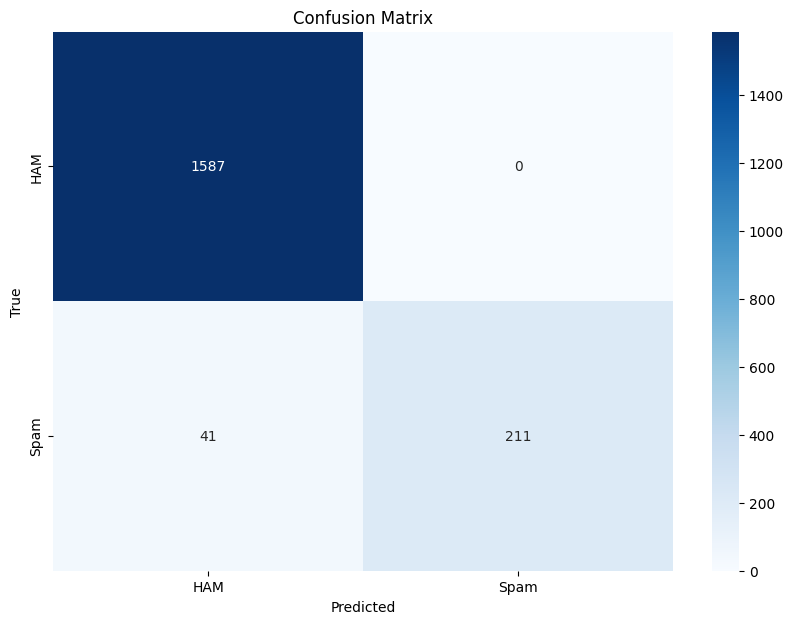

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['HAM', 'Spam'], yticklabels=['HAM', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()